# Pre-processing Steps


In [1]:
# Basis Library
import os , sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'C:\\Users\\ardra\\PycharmProjects\\pythonProject\\Data-science-study\\ML'

In [3]:
df= pd.read_excel('Employee_Data.xls')
df

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795
...,...,...,...,...,...,...,...
95,96,Tyrone,Barber,Sales and Marketing,47.0,22.0,79077
96,97,Urielle,Herrera,Sales and Marketing,46.0,20.0,81187
97,98,Brendan,Solis,Customer Relations,44.0,18.0,83847
98,99,Holmes,Nelson,Customer Relations,47.0,22.0,89158


In [4]:
mydata= df.copy()
mydata

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795
...,...,...,...,...,...,...,...
95,96,Tyrone,Barber,Sales and Marketing,47.0,22.0,79077
96,97,Urielle,Herrera,Sales and Marketing,46.0,20.0,81187
97,98,Brendan,Solis,Customer Relations,44.0,18.0,83847
98,99,Holmes,Nelson,Customer Relations,47.0,22.0,89158


In [5]:
# How many data poits and features have? 
df.shape

(100, 7)

In [6]:
# What are the columns name given in our data set
df.columns

Index(['Employee Id', 'First Name', 'Last Name', 'Department', 'Age',
       'Experience', 'Salary'],
      dtype='object')

In [7]:
df['Department'].value_counts()

Sales and Marketing    30
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [9]:
# What are the data types we have?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   81 non-null     object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [10]:
# pre-processing
# Part 1  :Handling Missing value
df.isnull().sum()/len(df)*100

Employee Id     0.0
First Name      0.0
Last Name       0.0
Department     19.0
Age            18.0
Experience     10.0
Salary          0.0
dtype: float64

In [12]:
# imputation is required in the missing variable
# Department - Object
# Age and Experience - Number
df['Department'].value_counts()

Sales and Marketing    30
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [13]:
df['Department'] = df['Department'].fillna('Sales and Marketing')

In [14]:
df['Department'].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

<AxesSubplot:ylabel='Age'>

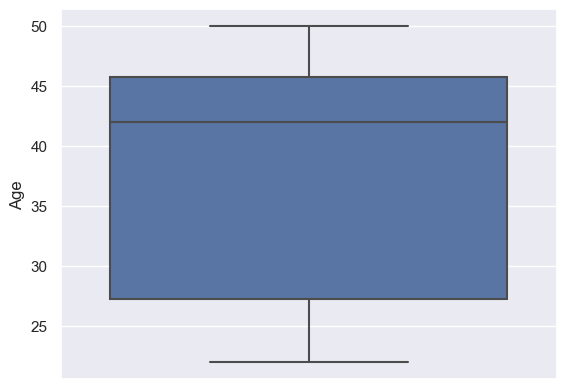

In [15]:
# Age and Experience - Numerical variables
# Mean or Median depending on outlier
# If outlier found median, If no outlier mean
sns.boxplot(y= 'Age', data=df)

<AxesSubplot:ylabel='Experience'>

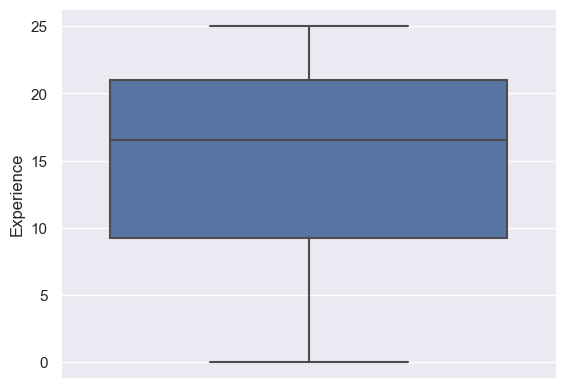

In [16]:
# No outlier : We can go with mean
sns.boxplot(y= 'Experience', data=df)

In [17]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

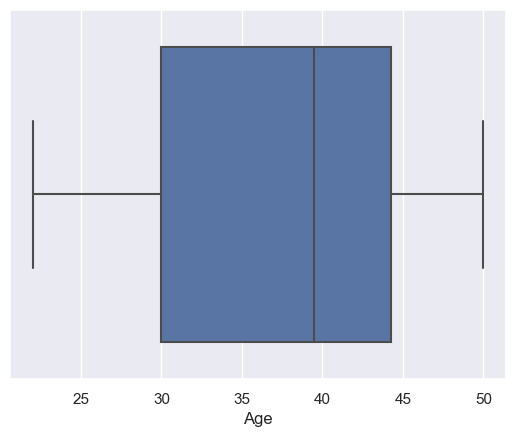

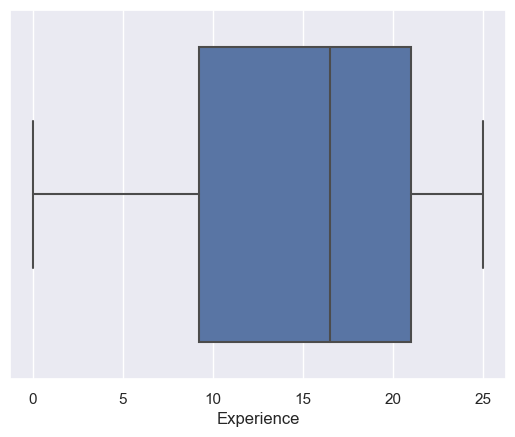

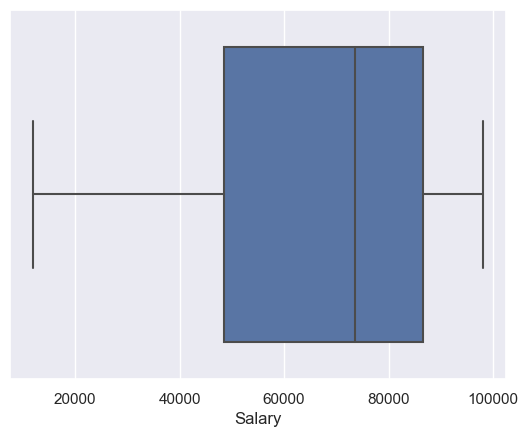

In [20]:
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()
for i in list(df.select_dtypes(exclude=['object']).columns)[1:]:
    boxplot(i)

In [21]:
mydata.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department     19
Age            18
Experience     10
Salary          0
dtype: int64

In [25]:
x = mydata.iloc[:,4:].values

array([[2.8000e+01, 3.0000e+00, 3.2889e+04],
       [2.2000e+01, 1.0000e+00, 1.5944e+04],
       [2.2000e+01, 1.0000e+00, 4.0343e+04],
       [2.2000e+01, 1.0000e+00, 1.9018e+04],
       [2.7000e+01, 0.0000e+00, 2.4795e+04],
       [2.6000e+01, 5.0000e+00, 1.5387e+04],
       [2.4000e+01, 6.0000e+00, 3.4117e+04],
       [2.9000e+01, 2.0000e+00, 1.6099e+04],
       [2.9000e+01, 5.0000e+00, 4.2105e+04],
       [3.0000e+01, 6.0000e+00, 1.1891e+04],
       [2.6000e+01, 5.0000e+00, 3.4687e+04],
       [2.6000e+01, 6.0000e+00, 2.3549e+04],
       [2.4000e+01, 5.0000e+00, 2.9110e+04],
       [2.2000e+01, 2.0000e+00, 3.3435e+04],
       [2.5000e+01, 3.0000e+00, 1.1830e+04],
       [2.5000e+01,        nan, 4.4065e+04],
       [2.2000e+01,        nan, 1.3266e+04],
       [2.5000e+01,        nan, 1.6631e+04],
       [2.7000e+01,        nan, 2.9886e+04],
       [2.5000e+01,        nan, 3.0464e+04],
       [2.2000e+01,        nan, 1.4943e+04],
       [2.2000e+01,        nan, 1.8632e+04],
       [2.

In [26]:
from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x = simple_imputer.fit_transform(x)

In [28]:
pd.DataFrame(x).isnull().sum()

0    0
1    0
2    0
dtype: int64

# Encoding

In [29]:
df.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [30]:
df_1 = df.iloc[:,3:]

In [31]:
df_1.head()

,Department,Age,Experience,Salary
0,Sales and Marketing,28.0,3.0,32889
1,Sales and Marketing,22.0,1.0,15944
2,Customer Relations,22.0,1.0,40343
3,Customer Relations,22.0,1.0,19018
4,Accounting,27.0,0.0,24795


In [35]:
df_1.isnull().sum()

Department     0
Age            0
Experience    10
Salary         0
dtype: int64

In [36]:
df_1['Experience'] = df_1['Experience'].fillna(df_1['Experience'].mean())

In [38]:
df_1.isnull().sum()

Department    0
Age           0
Experience    0
Salary        0
dtype: int64

In [39]:
df_1['Department'].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [40]:
# Label Encoder
df_1['Department'] = df_1['Department'].astype('category')
df_1['Department'] = df_1['Department'].cat.codes

In [42]:
df_1.head()

,Department,Age,Experience,Salary
0,2,28.0,3.0,32889
1,2,22.0,1.0,15944
2,1,22.0,1.0,40343
3,1,22.0,1.0,19018
4,0,27.0,0.0,24795


In [44]:
# One Hot Encoder
df_1 = pd.get_dummies(df_1, columns=['Department'])

In [45]:
df_1

,Age,Experience,Salary,Department_0,Department_1,Department_2
0,28.0,3.0,32889,0,0,1
1,22.0,1.0,15944,0,0,1
2,22.0,1.0,40343,0,1,0
3,22.0,1.0,19018,0,1,0
4,27.0,0.0,24795,1,0,0
...,...,...,...,...,...,...
95,47.0,22.0,79077,0,0,1
96,46.0,20.0,81187,0,0,1
97,44.0,18.0,83847,0,1,0
98,47.0,22.0,89158,0,1,0


In [46]:
# Dummy variable
df_1 = df_1.drop(['Department_1'], axis=1)

In [47]:
# Feature Scaling


In [49]:
# Standerdaisation
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
sc_fc= sc_x.fit_transform(df_1)

In [50]:
sc_fc

array([[-1.16485118e+00, -1.81044925e+00, -1.23482325e+00,
        -6.08163641e-01,  1.02020406e+00],
       [-1.86547071e+00, -2.11817433e+00, -1.88508853e+00,
        -6.08163641e-01,  1.02020406e+00],
       [-1.86547071e+00, -2.11817433e+00, -9.48775604e-01,
        -6.08163641e-01, -9.80196059e-01],
       [-1.86547071e+00, -2.11817433e+00, -1.76712361e+00,
        -6.08163641e-01, -9.80196059e-01],
       [-1.28162110e+00, -2.27203688e+00, -1.54543093e+00,
         1.64429429e+00, -9.80196059e-01],
       [-1.39839102e+00, -1.50272416e+00, -1.90646343e+00,
         1.64429429e+00, -9.80196059e-01],
       [-1.63193087e+00, -1.34886162e+00, -1.18769869e+00,
        -6.08163641e-01, -9.80196059e-01],
       [-1.04808125e+00, -1.96431179e+00, -1.87914039e+00,
        -6.08163641e-01, -9.80196059e-01],
       [-1.04808125e+00, -1.50272416e+00, -8.81158761e-01,
        -6.08163641e-01,  1.02020406e+00],
       [-9.31311332e-01, -1.34886162e+00, -2.04062262e+00,
        -6.08163641e-01

In [51]:
# Normalisation
from sklearn.preprocessing import Normalizer
nor_x= Normalizer()
nor_x = nor_x.fit_transform(df_1)
nor_x

array([[8.51348163e-04, 9.12158746e-05, 9.99999633e-01, 0.00000000e+00,
        3.04052915e-05],
       [1.37982808e-03, 6.27194584e-05, 9.99999044e-01, 0.00000000e+00,
        6.27194584e-05],
       [5.45323767e-04, 2.47874439e-05, 9.99999851e-01, 0.00000000e+00,
        0.00000000e+00],
       [1.15679805e-03, 5.25817294e-05, 9.99999330e-01, 0.00000000e+00,
        0.00000000e+00],
       [1.08892857e-03, 0.00000000e+00, 9.99999406e-01, 4.03306879e-05,
        0.00000000e+00],
       [1.68973559e-03, 3.24949151e-04, 9.99998517e-01, 6.49898302e-05,
        0.00000000e+00],
       [7.03461432e-04, 1.75865358e-04, 9.99999737e-01, 0.00000000e+00,
        0.00000000e+00],
       [1.80135118e-03, 1.24231116e-04, 9.99998370e-01, 0.00000000e+00,
        0.00000000e+00],
       [6.88754136e-04, 1.18750713e-04, 9.99999755e-01, 0.00000000e+00,
        2.37501426e-05],
       [2.52290814e-03, 5.04581628e-04, 9.99996690e-01, 0.00000000e+00,
        0.00000000e+00],
       [7.49560135e-04, 1.4414

# EDA Cars

In [59]:
cars= pd.read_excel("EDA Cars.xlsx")
cars.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
3,4,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0
4,5,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0


In [54]:
cars.isnull().sum()

INDEX              0
INCOME            43
MARITAL STATUS    28
SEX                6
EDUCATION         44
JOB               46
TRAVEL TIME       41
USE               53
MILES CLOCKED     25
CAR TYPE          10
CAR AGE           20
CITY               6
POSTAL CODE        3
dtype: int64

<AxesSubplot:ylabel='INCOME'>

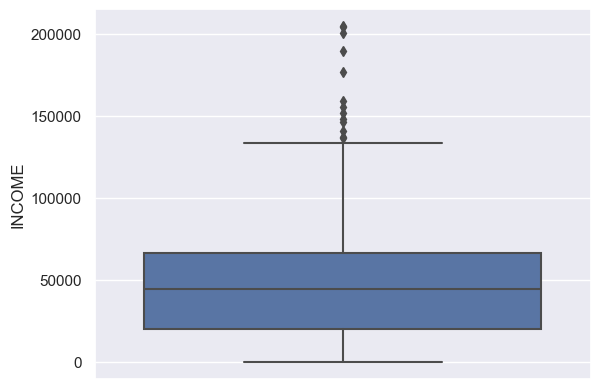

In [60]:
sns.boxplot(y= 'INCOME', data= cars)

In [57]:
cars['INCOME']= cars['INCOME'].fillna(cars['INCOME'].median())

In [63]:
# Handling outlier
def remove_outlier(col):
    sorted(col)
    Q1, Q3 =col.quantile([0.25, 0.75])
    IQR= Q3- Q1
    lower_range= Q1- (1.5* IQR)
    upper_range= Q3+ (1.5* IQR)
    return lower_range, upper_range

In [64]:
lr_income, up_income = remove_outlier(cars['INCOME'])

In [65]:
print(lr_income, up_income)

-48596.429524999985 135535.07593499997


In [67]:
cars['INCOME'] = np.where(cars['INCOME'] > up_income, up_income, cars['INCOME'])
cars['INCOME'] = np.where(cars['INCOME'] < lr_income, lr_income, cars['INCOME'])

<AxesSubplot:ylabel='INCOME'>

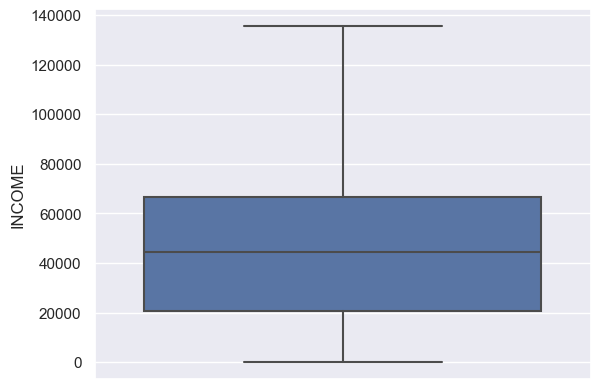

In [68]:
sns.boxplot(y= 'INCOME', data= cars)